# Salary predictor

Origem do dataset: https://www.kaggle.com/datasets/johnolafenwa/us-census-data/versions/1?resource=download

**Desafio**: Predizer o salário anual (se maior ou menor que 50k) baseado nos dados coletados do censo demográfico de 1994 nos Estados Unidos.

**Cenário do desafio** : Uma multinacional quer estudar o plano de carreira e de salário (anual) dos seus colaboradores e futuros contratados. Sabe-se que o valor salarial tem uma correlação diretamente proporcional ao nível escolar, hard skills e atualmente conta também com a soft skills.

**Objetivo do projeto** : Contratar os melhores candidatos e reestruturar o plano de carreira da empresa,com auxílio do modelo de inteligência artificial, no prazo de seis meses para que possa realizar projetos em escala mundial. **Fazer o business model canvas**


## Hipóteses

1. Pessoas brancas recebem mais educação. Logo, recebem maiores salários.
2. A correlação salarial é diretamente proporcional ao grau de instrução.
3. Os servidores públicos recebem mais que os empregados privados
4. Homens estudam mais, logo ganham mais.
5. Pessoas domiciliadas em países de primeiro mundo tendem a receber mais e são empreendedores.
6. Os homens tendem a se arriscar mais no empreendedorismo. Logo, perdem mais dinheiro.
7. Os solteiros tendem a ganhar menos, pois não atingiram a maturidade profissional
8. Profissionais casados tendem a buscar tranquilidade e não buscam projetos 'arriscados'.
9. O auge da carreira tem correlação positiva com a idade

### Validando hipóteses:
1. No geral, as pessoas brancas recebem mais. E foi validado que quanto mais se estudou, as pessoas brancas atingiram um níviel salarial maior.
2. **Não**. No nosso estudo, o valor salarial depende muito do cargo que se exerce.
3. Os empregados **privados** ganham mais que os servidores públicos
4. Na nossa amostra, temos mais homens que mulheres. Precisaríamos de mais dados referente às mulheres para responder a esta pergunta.
5. Temos mais dados americanos, esta pergunta pode enviesar o trabalho.
6. 
7. Depende muito do conceito de maturidade profissional. Nos dados, temos o exemplo da Amanda que com 19 anos tem um rendimento anual superior a 50k.
8. 
9. Os mais velhos atingiram o cargos de alta gerência. Talvez poderíamos afirmar esta hipótese.

## Conhecendo os dados

Nesta etapa, vamos carregar os dois datasets disponibilizados pela Kaggle (trainining e test) e juntar os dois para termos mais base de dados a serem analisados e melhorar a qualidade dos insights gerados pelos estudos.

In [1]:
#importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Carregando os arquivos de treino e de teste

df_treino = pd.read_csv('adult-training.csv', header= None)
df_teste= pd.read_csv('adult-test.csv',  header= None)

#juntando os dois datasets
df_m = pd.merge(df_treino, df_teste, how="outer")
df_m.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2891,40,Private,174515,HS-grad,9,Married-spouse-absent,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
10610,30,Private,66278,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [3]:
#Os arquivos disponibilizados não contém o nome das colunas. Pelas informações da fonte, mapeamos cada coluna \
# e as renomeamos.

#Trabalhando com os nomes das colunas:
df_m.rename(columns= {0:'age',
                           1: 'work_class',
                           2:'fnlwgt',
                           3:'education', 
                           4:'education_num', 
                           5:'marital_status', 
                           6:'occupation',
                           7:'relationship',
                           8:'race',
                           9:'sex',
                           10:'capital_gain',
                           11:'capital_loss',
                           12:'hours_per_week',
                           13:'native_country',
                           14:'annual_income'},
                           inplace=True)

#verificando o resultado
df_m.sample(3)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
689,26,Private,167350,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0,0,30,United-States,<=50K
31273,74,Private,54732,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K
11143,22,Private,181313,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K


In [4]:
#conhecendo o tipo de dados do dataset
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   work_class      48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  annual_income   48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [5]:
#Percebeu-se que há valores ' ?' no dataset, vamos subsitui-los por NaN e preenchê-lo com valores mais próximos
#Substituindo ' ?' por valores NaN
df_m.replace(' ?', np.nan, inplace=True)
df_m.isnull().sum()

#preenchendo os valores nulos com os mais próximos
df_m.fillna(method='bfill', inplace=True)
df_m.isnull().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_income     0
dtype: int64

In [10]:
#salvando o datset tratado para fazer a análise exploratória dos dados
df_m.to_csv('salary_f.csv', index=False)

## Análise Exploratória dos dados

### Vamos por a mão na massa! conhecendo a fundo os dados para validar as hipóteses levantadas

In [107]:
#carregando os dados semitratados
df_f= pd.read_csv('salary_f.csv')
df_f.head(3)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


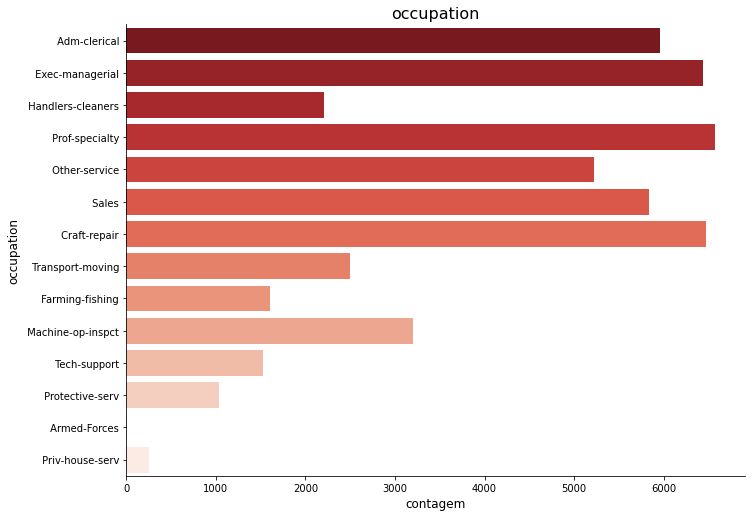

In [108]:
#Sendo uma multinacional, vamos verificar quais profissoões contém o dataset:

occupation = sns.catplot(y="occupation", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
occupation.ax.set_title("occupation",fontdict={'size':16})
occupation.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
occupation.ax.yaxis.set_label_text("occupation",fontdict= {'size':12})
plt.show()

#Vamos retirar as infomações dos cargos de prof_specialty, other-service, craft-repair, \
#farming-fishing, armed-forced, priv-house-serv por não caracterizar como cargos da multinacional.

In [111]:
remove_occup= df_f.loc[(df_f['occupation']==' Prof-specialty') |
                      (df_f['occupation']==' Other-service') |
                      (df_f['occupation']== ' Craft-repair') |
                      (df_f['occupation']== ' Farming-fishing')|
                      (df_f['occupation']== ' Armed-Forces') |
                      (df_f['occupation']==' Priv-house-serv')].index

df_f = df_f.drop(remove_occup)

In [112]:
df_f.occupation.value_counts()

 Exec-managerial      6436
 Adm-clerical         5961
 Sales                5840
 Machine-op-inspct    3206
 Transport-moving     2495
 Handlers-cleaners    2203
 Tech-support         1527
 Protective-serv      1040
Name: occupation, dtype: int64

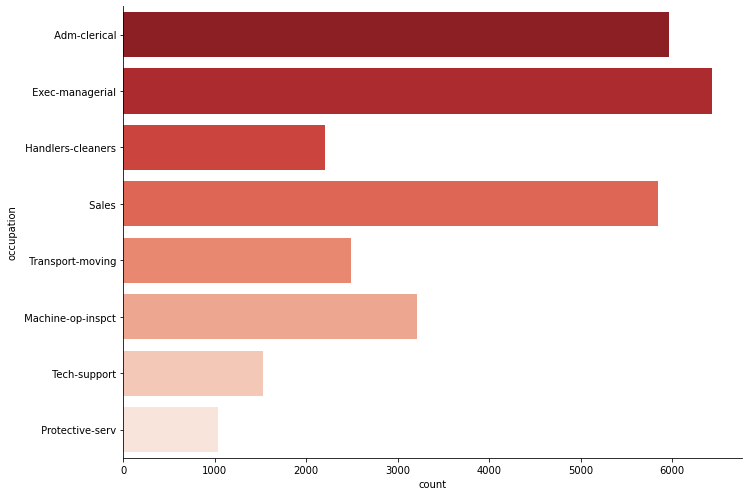

In [113]:
occupation = sns.catplot(y="occupation", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)

In [114]:
#Da mesma forma como a occupação, vamos retirar do dataset, a classe governamental (state-gov, Federal-gov)
df_f.work_class.value_counts()

 Private             22037
 Self-emp-not-inc     1656
 Local-gov            1611
 Self-emp-inc         1232
 State-gov            1095
 Federal-gov          1062
 Without-pay            11
 Never-worked            4
Name: work_class, dtype: int64

In [115]:
remove_work_class= df_f.loc[(df_f['work_class']==' Local-gov') |
                        (df_f['work_class']==' State-gov') |
                      (df_f['work_class']==' Federal-gov')].index



df_f = df_f.drop(remove_work_class)

In [116]:
df_f.work_class.value_counts()

 Private             22037
 Self-emp-not-inc     1656
 Self-emp-inc         1232
 Without-pay            11
 Never-worked            4
Name: work_class, dtype: int64

**Dúvida dos dados**
1. O que são as colunas fnlwgt, education_num, relationship, capital_gain, capital_loss?


## O persona

In [118]:
#conhecendo os valores estatísticos dos dados
df_f.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,24940.000000,24940,2.494000e+04,24940,24940.000000,24940,24940,24940,24940,24940,24940.000000,24940.00000,24940.000000,24940,24940
unique,NaN,5,NaN,16,NaN,7,8,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Sales,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22037,NaN,8474,NaN,11193,5784,9767,21533,16242,NaN,NaN,NaN,22916,12586
mean,38.127666,NaN,1.915306e+05,NaN,9.968244,NaN,NaN,NaN,NaN,NaN,1038.913953,89.59992,40.761909,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,1.000000,NaN,NaN
25%,27.000000,NaN,1.204762e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,40.000000,NaN,NaN
50%,36.000000,NaN,1.797125e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,40.000000,NaN,NaN
75%,47.000000,NaN,2.372362e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,45.000000,NaN,NaN


O nosso persona consinste em um homem branco, com 37 anos, professor especializado, casado com rendimento anual abaixo ou igual a 50k.

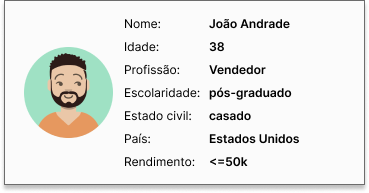

**Quem são outros personas?**

In [120]:
#Perfil dos mais novos
df_idade1 = df_f[df_f['age']==17]
df_idade1.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,292.0,292,292.000000,292,292.000000,292,292,292,292,292,292.000000,292.000000,292.00000,292,292
unique,NaN,4,NaN,8,NaN,3,8,4,5,2,NaN,NaN,NaN,9,2
top,NaN,Private,NaN,11th,NaN,Never-married,Sales,Own-child,White,Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,279,NaN,146,NaN,290,146,264,269,167,NaN,NaN,NaN,281,189
mean,17.0,NaN,182703.126712,NaN,6.797945,NaN,NaN,NaN,NaN,NaN,139.123288,22.746575,19.64726,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.0,NaN,23856.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,4.00000,NaN,NaN
25%,17.0,NaN,116074.500000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,15.00000,NaN,NaN
50%,17.0,NaN,165639.500000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.00000,NaN,NaN
75%,17.0,NaN,225681.000000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,24.00000,NaN,NaN


Este é o perfil do persona mais novo do nosso dataset:
Ao todo são 595 perfis que se encaixam aqui.


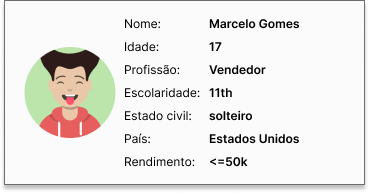

In [121]:
#Perfil dos mais velhos
df_idade3= df_f[df_f['age']==90]
df_idade3.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,28.0,28,28.000000,28,28.000000,28,28,28,28,28,28.00,28.000000,28.000000,28,28
unique,NaN,2,NaN,9,NaN,5,6,6,3,2,NaN,NaN,NaN,4,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,26,NaN,9,NaN,10,11,9,25,17,NaN,NaN,NaN,25,20
mean,90.0,NaN,167394.821429,NaN,9.892857,NaN,NaN,NaN,NaN,NaN,794.75,290.178571,35.142857,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,90.0,NaN,39824.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,4.000000,NaN,NaN
25%,90.0,NaN,84071.750000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,18.750000,NaN,NaN
50%,90.0,NaN,160512.500000,NaN,9.500000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,40.000000,NaN,NaN
75%,90.0,NaN,233555.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,40.000000,NaN,NaN


E este, o mais velho, composto por 55 pessoas:

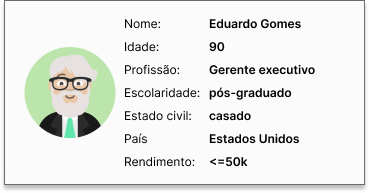  

### E quem são os que ganham mais de 50k/ano?

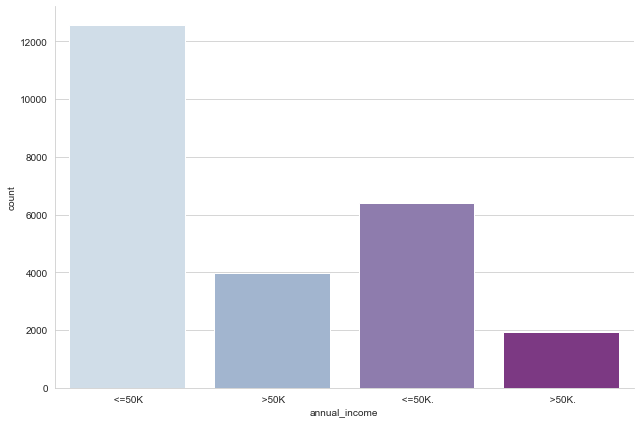

In [122]:
#Conferindo a classe para verificação. 
sns.set_style("whitegrid")
classe = sns.catplot(x="annual_income", data=df_f, kind="count", palette="BuPu", height=6, aspect=1.5)

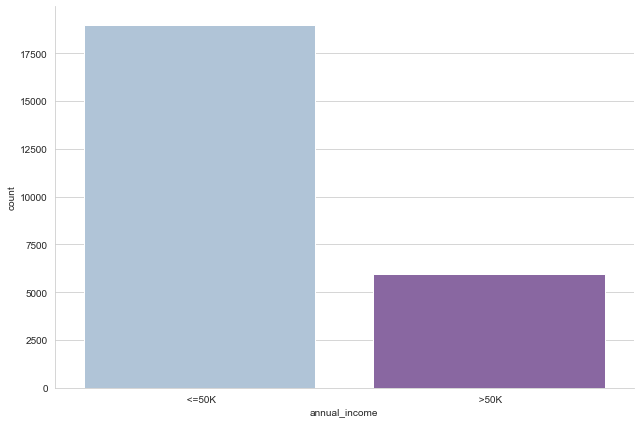

In [123]:
#há espaços em branco antes dos nomes. Vamos cuidá-los usando o método replace
df_f.replace(' <=50K.', ' <=50K', inplace=True)
df_f.replace(' >50K.', ' >50K', inplace=True)
df_f.annual_income.value_counts()

#plot da classe

classe = sns.catplot(x="annual_income", data=df_f, kind="count", palette="BuPu", height=6, aspect=1.5)

In [124]:
#isolando os que ganham mais de 50k
df_upper = df_f[df_f['annual_income']== ' >50K']
df_upper.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,5934.000000,5934,5.934000e+03,5934,5934.000000,5934,5934,5934,5934,5934,5934.000000,5934.000000,5934.000000,5934,5934
unique,NaN,4,NaN,16,NaN,7,8,6,5,2,NaN,NaN,NaN,38,1
top,NaN,Private,NaN,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,>50K
freq,NaN,4753,NaN,1923,NaN,5121,2520,4546,5463,5063,NaN,NaN,NaN,5566,5934
mean,44.317661,NaN,1.890032e+05,NaN,11.266262,NaN,NaN,NaN,NaN,NaN,3909.189585,205.642905,46.125548,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,19.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,36.000000,NaN,1.201310e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,43.000000,NaN,1.769035e+05,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN
75%,51.000000,NaN,2.310920e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,50.000000,NaN,NaN


In [125]:
# perfil de quem idade menor
df_upper1 = df_upper[df_upper['age']== 19]
df_upper1.describe(include='all')


,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,1.0,1,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0,1,1
unique,NaN,1,NaN,1,NaN,1,1,1,1,1,NaN,NaN,NaN,1,1
top,NaN,Self-emp-inc,NaN,12th,NaN,Married-civ-spouse,Exec-managerial,Other-relative,White,Female,NaN,NaN,NaN,United-States,>50K
freq,NaN,1,NaN,1,NaN,1,1,1,1,1,NaN,NaN,NaN,1,1
mean,19.0,NaN,200790.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,15024.0,0.0,40.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,19.0,NaN,200790.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,15024.0,0.0,40.0,NaN,NaN
25%,19.0,NaN,200790.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,15024.0,0.0,40.0,NaN,NaN
50%,19.0,NaN,200790.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,15024.0,0.0,40.0,NaN,NaN
75%,19.0,NaN,200790.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,15024.0,0.0,40.0,NaN,NaN


In [126]:
# perfil de quem idade maior
df_upper3 = df_upper[df_upper['age']== 90]
df_upper3.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,6.0,6,6.000000,6,6.000000,6,6,6,6,6,6.00,6.000000,6.00,6,6
unique,NaN,1,NaN,4,NaN,2,3,3,2,2,NaN,NaN,NaN,2,1
top,NaN,Private,NaN,Bachelors,NaN,Never-married,Exec-managerial,Not-in-family,White,Male,NaN,NaN,NaN,United-States,>50K
freq,NaN,6,NaN,2,NaN,3,3,3,5,4,NaN,NaN,NaN,5,6
mean,90.0,NaN,126999.833333,NaN,12.166667,NaN,NaN,NaN,NaN,NaN,2580.50,304.166667,40.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,90.0,NaN,46786.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,15.00,NaN,NaN
25%,90.0,NaN,61055.750000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,40.00,NaN,NaN
50%,90.0,NaN,119030.000000,NaN,12.500000,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,42.50,NaN,NaN
75%,90.0,NaN,185477.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,4572.75,0.000000,48.75,NaN,NaN


### Perfil consolidados das pessoas que ganham mais de 50k/ano:

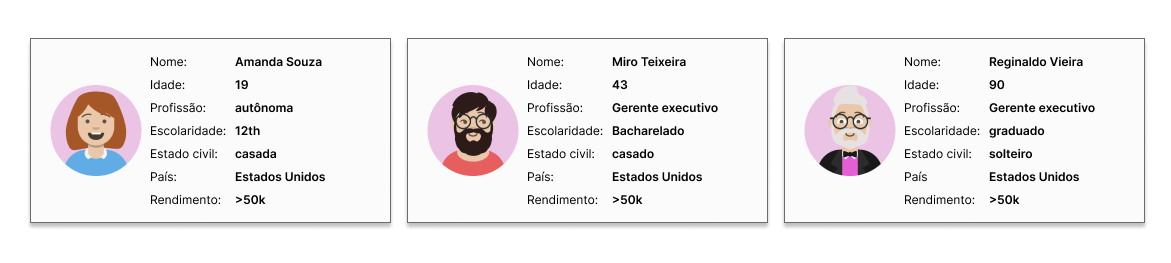

1. Apenas uma pessoa se enquadra no perfil dos mais novos.
2. Perfil da média dos que ganham mais de 50k/ano são homens de 43 anos, gerente executivo, bacharel e casados. 
3. Dentre as pessoas com 90 anos (6 pessoas) são da iniciativa privada

### Temos apenas a Amanda no perfil geral. Vamos explorar quem são as mulheres?

#### Perfil geral das mulheres
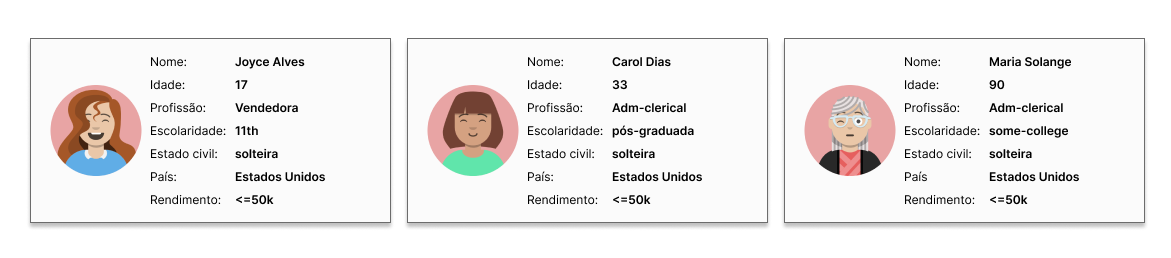

Mulheres solteiras tendem a ter mais sucesso na carreira?

In [127]:
#isolando as mulheres no dataset:
df_fem = df_f[df_f['sex'] != " Male"]
df_fem.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,8698.000000,8698,8.698000e+03,8698,8698.000000,8698,8698,8698,8698,8698,8698.00000,8698.000000,8698.000000,8698,8698
unique,NaN,5,NaN,16,NaN,7,8,6,5,1,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Never-married,Adm-clerical,Not-in-family,White,Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,8187,NaN,3000,NaN,3984,3116,3079,7139,8698,NaN,NaN,NaN,7995,7827
mean,36.062083,NaN,1.889780e+05,NaN,9.886066,NaN,NaN,NaN,NaN,NaN,536.12819,59.917452,36.756266,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,1.000000,NaN,NaN
25%,24.000000,NaN,1.204610e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,34.000000,NaN,NaN
50%,33.000000,NaN,1.774000e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,40.000000,NaN,NaN
75%,45.000000,NaN,2.304982e+05,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,40.000000,NaN,NaN


In [128]:
df_fem1=df_fem[df_fem['age']==17]
df_fem1.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,167.0,167,167.000000,167,167.000000,167,167,167,167,167,167.00000,167.000000,167.000000,167,167
unique,NaN,4,NaN,7,NaN,2,8,4,4,1,NaN,NaN,NaN,6,1
top,NaN,Private,NaN,11th,NaN,Never-married,Sales,Own-child,White,Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,161,NaN,88,NaN,166,111,148,151,167,NaN,NaN,NaN,161,167
mean,17.0,NaN,180145.928144,NaN,6.820359,NaN,NaN,NaN,NaN,NaN,223.91018,9.592814,18.784431,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.0,NaN,23856.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,4.000000,NaN,NaN
25%,17.0,NaN,110760.500000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,14.500000,NaN,NaN
50%,17.0,NaN,156736.000000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,20.000000,NaN,NaN
75%,17.0,NaN,216968.500000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,22.500000,NaN,NaN


In [129]:
df_fem1=df_fem[df_fem['age']==90]
df_fem1.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,11.0,11,11.000000,11,11.000000,11,11,11,11,11,11.000000,11.000000,11.000000,11,11
unique,NaN,1,NaN,6,NaN,5,3,5,2,1,NaN,NaN,NaN,3,2
top,NaN,Private,NaN,Some-college,NaN,Never-married,Adm-clerical,Not-in-family,White,Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,11,NaN,3,NaN,4,6,4,10,11,NaN,NaN,NaN,9,9
mean,90.0,NaN,184101.636364,NaN,9.636364,NaN,NaN,NaN,NaN,NaN,90.090909,572.727273,30.818182,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,90.0,NaN,77053.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,10.000000,NaN,NaN
25%,90.0,NaN,127483.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,NaN,NaN
50%,90.0,NaN,171956.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,90.0,NaN,227063.500000,NaN,11.500000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN


### Respondendo as hipóteses 6 e 8

6. Os homens tendem a se arriscar mais no empreendedorismo. Logo, perdem mais dinheiro.
7. 
8. Profissionais casados tendem a buscar tranquilidade e não buscam projetos 'arriscados'.

#### plotando alguns gráficos individualmente para auxiliar na validação das hipóteses

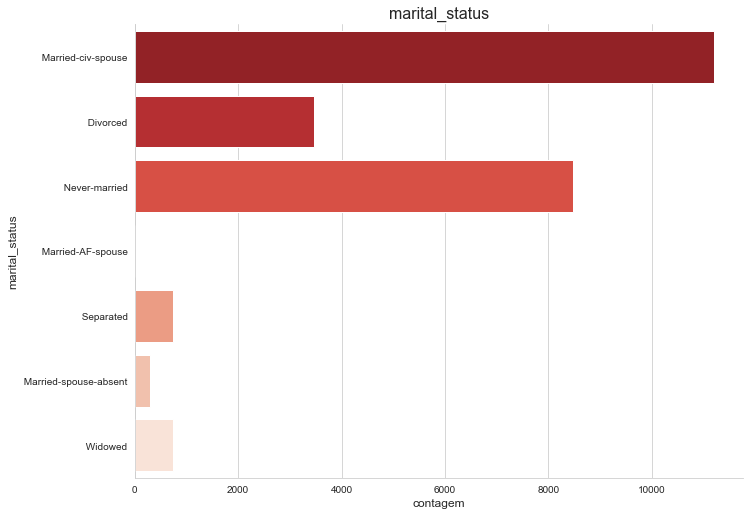

In [130]:
marital = sns.catplot(y="marital_status", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
marital.ax.set_title("marital_status",fontdict={'size':16})
marital.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
marital.ax.yaxis.set_label_text("marital_status",fontdict= {'size':12})
plt.show()

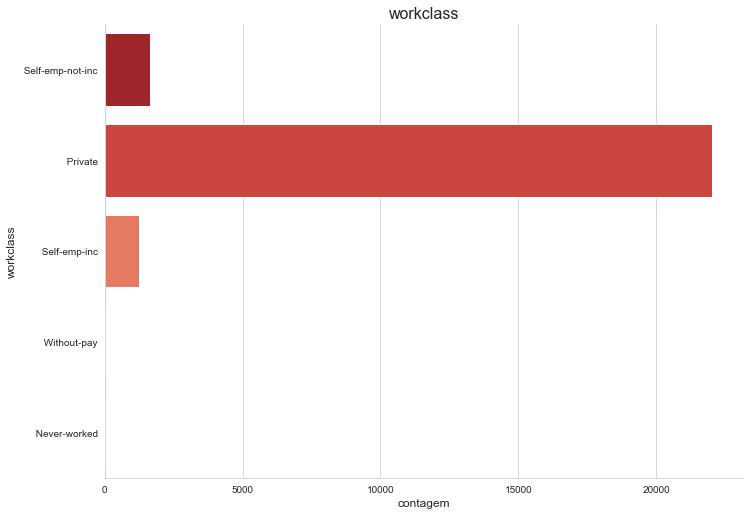

In [131]:
workclass = sns.catplot(y="work_class", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
workclass.ax.set_title("workclass",fontdict={'size':16})
workclass.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
workclass.ax.yaxis.set_label_text("workclass",fontdict= {'size':12})
plt.show()

#without-pay = desempregado
#never-worked= geração nem nem

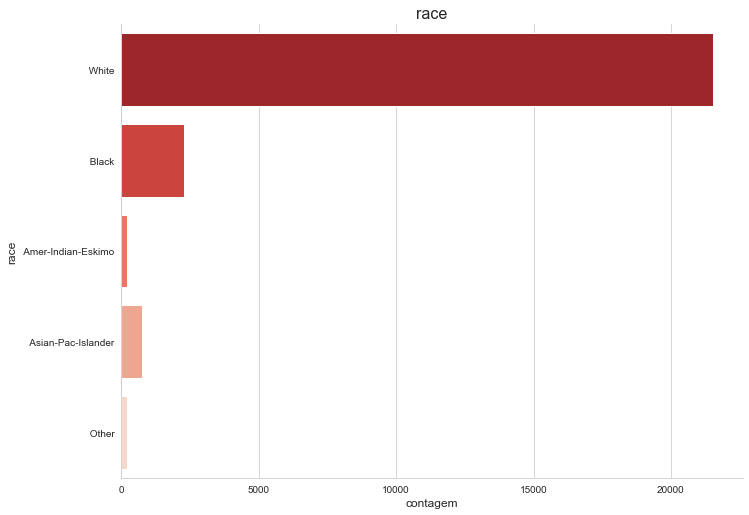

In [133]:
race = sns.catplot(y="race", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
race.ax.set_title("race",fontdict={'size':16})
race.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
race.ax.yaxis.set_label_text("race",fontdict= {'size':12})
plt.show()

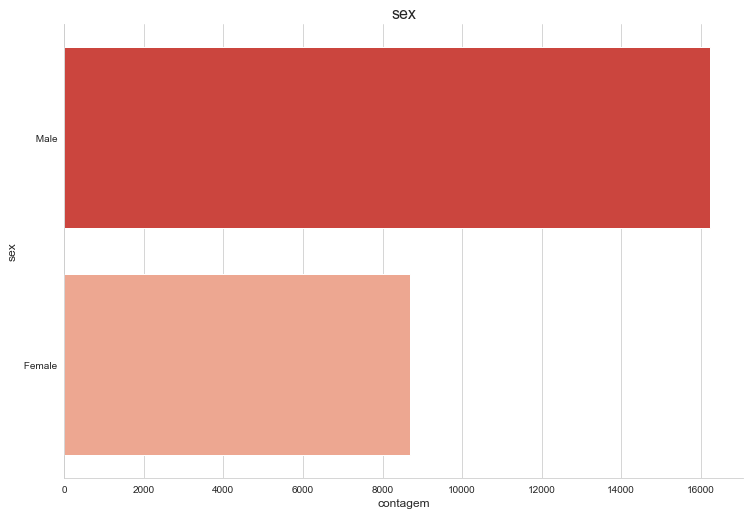

In [134]:
sex = sns.catplot(y="sex", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
sex.ax.set_title("sex",fontdict={'size':16})
sex.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
sex.ax.yaxis.set_label_text("sex",fontdict= {'size':12})
plt.show()

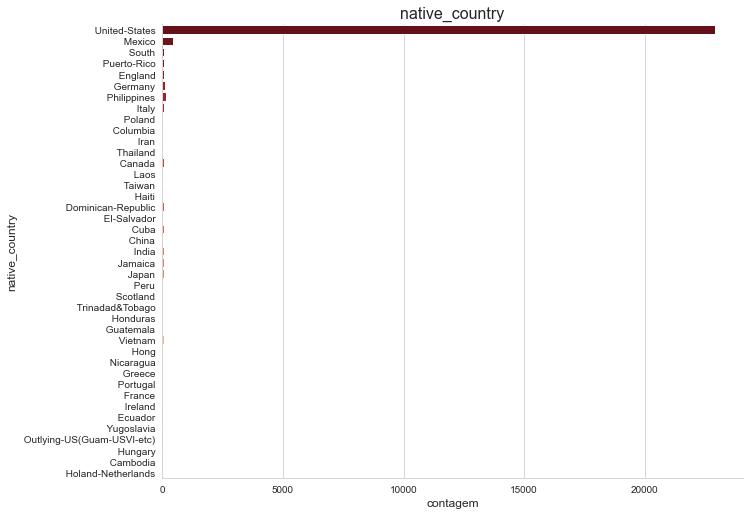

In [135]:
nac = sns.catplot(y="native_country", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
nac.ax.set_title("native_country",fontdict={'size':16})
nac.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
nac.ax.yaxis.set_label_text("native_country",fontdict= {'size':12})
plt.show()

#tantas nacionalidades... vamos agrupá-los de acordo com o continente

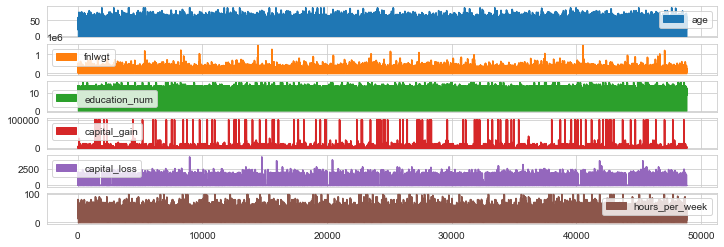

In [136]:
#visão geral dos dados numéricos
axs = df_f.plot.area(figsize=(12, 4), subplots=True)

#### Notas para a construção do modelo preditivo:

- balancear as classes
- normalizar/padronizar os dados
- drop das colunas: fnlwgt (por ter correlação 0), education_num(por eu nao saber o que significa)
- capital_gain e capital_loss também são a somatória. Logo, vou deixar os valores em booleanos (0/1)
- agrupar a nacionalidade por continente
- cuidar da classe com label encoder

## Cuidando das colunas

### Verificando a distribuiçao dos dados

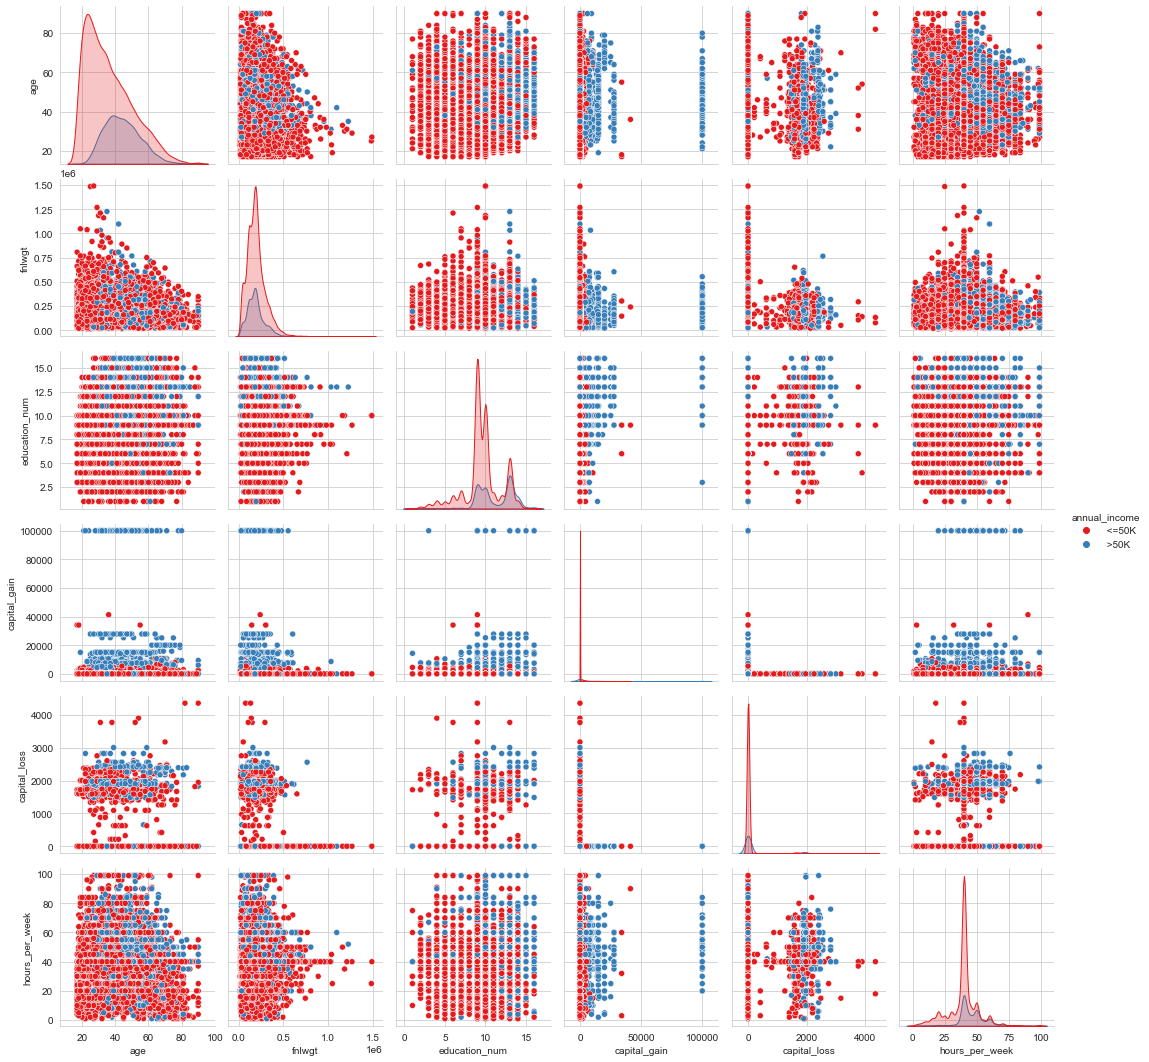

In [137]:
#verficando a distrituiçao dos dados
sns.pairplot(df_f, hue='annual_income', palette='Set1')

Checando a distribuição dos dados de acordo com o valor anual do salário.\
Percebemos que há uma distribuição assimétrica a esquerda. \
Portanto, vamos padronizar os dados para que possamos obter um resultado esperado

<AxesSubplot:>

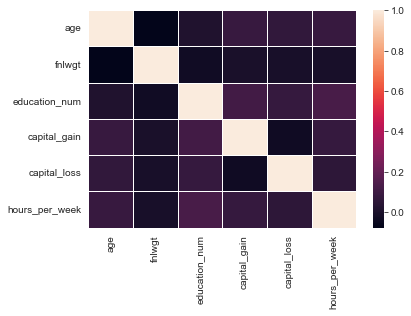

In [138]:
#verificando a correlação dos dados
sns.heatmap(df_f.corr(), cbar=True, lw=0.5) #lw = linewidth

#Decisão de mestre: Vou excluir a coluna fnlwgt por ter correlação 0

In [141]:
#dropando as colunas
df_f= df_f.drop(columns=['fnlwgt', 'education_num'])

KeyError: "['fnlwgt', 'education_num'] not found in axis"

In [143]:
df_f= df_f.drop(columns=['relationship'])
df_f

,age,work_class,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48830,32,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
48831,48,Private,HS-grad,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,United-States,<=50K
48832,61,Private,HS-grad,Married-civ-spouse,Sales,White,Male,0,0,48,United-States,<=50K
48840,44,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [144]:
#capital gain  e capital loss
df_f['capital_gain'] = df_f['capital_gain'].apply(lambda x:1 if x>0 else 0)
df_f['capital_loss'] = df_f['capital_loss'].apply(lambda x:1 if x>0 else 0)
print('A contagem de capital gain é :', df_f.capital_gain.value_counts())
print('A contagem de capital loss é : ', df_f.capital_loss.value_counts())

A contagem de capital gain é : 0    22898
1     2042
Name: capital_gain, dtype: int64
A contagem de capital loss é :  0    23749
1     1191
Name: capital_loss, dtype: int64


In [145]:
#verificando os valores unicos da nacionalidade para auxiliar no agrupamento
df_f.native_country.unique()

array([' United-States', ' Mexico', ' South', ' Puerto-Rico', ' England',
       ' Germany', ' Philippines', ' Italy', ' Poland', ' Columbia',
       ' Iran', ' Thailand', ' Canada', ' Laos', ' Taiwan', ' Haiti',
       ' Dominican-Republic', ' El-Salvador', ' Cuba', ' China', ' India',
       ' Jamaica', ' Japan', ' Peru', ' Scotland', ' Trinadad&Tobago',
       ' Honduras', ' Guatemala', ' Vietnam', ' Hong', ' Nicaragua',
       ' Greece', ' Portugal', ' France', ' Ireland', ' Ecuador',
       ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)', ' Hungary',
       ' Cambodia', ' Holand-Netherlands'], dtype=object)

In [146]:
#Separando em continentes
#Country Groupings
Asia = [" Laos", " Thailand", " Taiwan", " Vietnam", " Japan", " Cambodia", " China", " India", " Philippines", " Hong", " Iran"]
Europa = [" Hungary", " Yugoslavia", " France", " Scotland", " Ireland", " Greece", " Poland", " Portugal", " Italy", " England",
         " Germany", " Holand-Netherlands"]
AmericaLatina = [" Honduras", " Trinadad&Tobago",  " Nicaragua", " Peru", " Ecuador", " Guatemala", " Jamaica", " Columbia", " Haiti",
               " Dominican-Republic", " Cuba", " El-Salvador", " Mexico"]
AmericaNorte = [" Puerto-Rico", " Outlying-US(Guam-USVI-etc)", " Canada"," United-States"]

In [147]:
#Agrupando em continentes

def convertCountry(country):
    
    if country in Asia:
        return " Asia" 
    
    
    if country in Europa:
        return " Europa"
    
    
    if country in AmericaLatina:
        return " AmericaLatina" 
    
    
    if country in AmericaNorte:
        return " AmericaNorte" 
    
    
    if country == " South":
        return "Desconhecido"
    
    return country 

df_f["native_country"] = df_f["native_country"].apply(convertCountry)

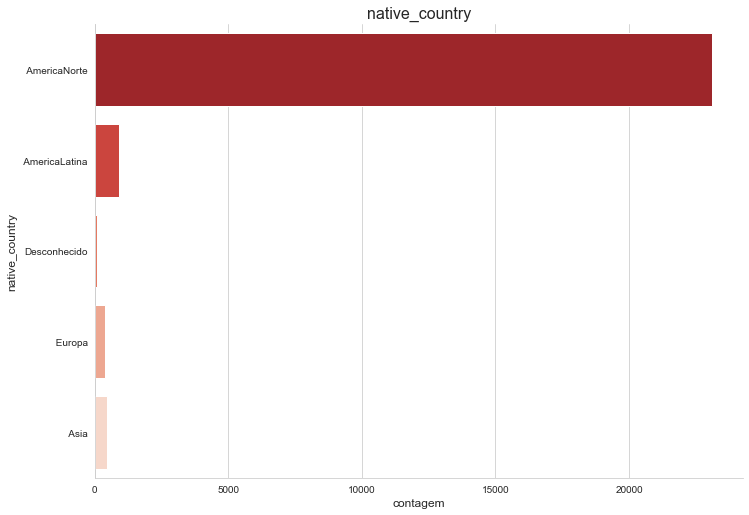

In [148]:
nac_t = sns.catplot(y="native_country", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
nac_t.ax.set_title("native_country",fontdict={'size':16})
nac_t.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
nac_t.ax.yaxis.set_label_text("native_country",fontdict= {'size':12})
plt.show()

In [149]:
#salvando o dataset tratado ate agora
df_f.to_csv('salary_f1.csv', index=False)

## Modelo Preditivo

### Objetivo do modelo preditivo: ter um desempenho superior a 83% de acerto

In [150]:
#importando as bibliotecas necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,)

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [151]:
#carregando o dataset para construção do modelo preditivo
df_mp= pd.read_csv('salary_f1.csv')
df_mp.sample(2)

,age,work_class,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
22538,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,AmericaNorte,>50K
4658,43,Private,Bachelors,Divorced,Sales,White,Male,0,0,44,AmericaNorte,>50K


In [152]:
#Separando os dados em X e y
X = df_mp.drop('annual_income', axis = 1)
y = df_mp['annual_income']

X.shape, y.shape

((24940, 11), (24940,))

<AxesSubplot:xlabel='annual_income', ylabel='count'>

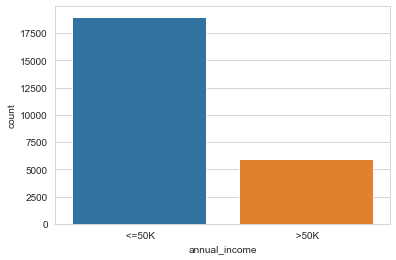

In [153]:
#Verificando o tamanho do y. 
sns.countplot(x=y)
#Vamos utilizar o undersampling para balancear o target do dataset

In [154]:
#Vamos utilizar o Label Encoder para tratar os dados categóricos
# O Label Encoder nos permite 'descodificar' posteriormente. A ordem da codificação é por ordem alfabética dos dados.

#instanciando
le = LabelEncoder()

df_mp = df_mp.apply(LabelEncoder().fit_transform)
df_mp.sample(2)

,age,work_class,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
12572,17,1,15,2,1,4,1,0,0,44,1,0
23215,10,1,15,4,0,2,0,0,0,29,1,0


<AxesSubplot:>

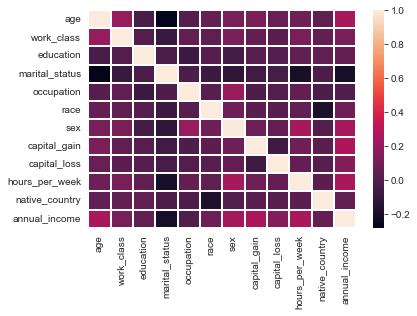

In [167]:
#Verificando a correlação dos valores depois de tratá-los
sns.heatmap(df_mp.corr(), cbar=True, lw=0.3)

In [155]:
#Separando os dados em X e y
X = df_mp.drop('annual_income', axis = 1)
y = df_mp['annual_income']

X.shape, y.shape

((24940, 11), (24940,))

In [188]:
#Verificando as features mais importantes
RF_Class = RandomForestClassifier(random_state=123)
RF_Class.fit(X,y)

#buscando as melhores features
feature_imp = pd.Series(RF_Class.feature_importances_,index=X.columns).sort_values(ascending=False)


# Selecionando as features de maior importância.
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.04:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)



age: 33%
marital_status: 19%
hours_per_week: 17%
education: 13%
occupation: 10%
capital_gain: 6%


In [189]:
# Treinando os modelos utilizando apenas as features selecionadas.
X = df_mp[features_selected]
y = df_mp['annual_income']

<AxesSubplot:xlabel='annual_income', ylabel='count'>

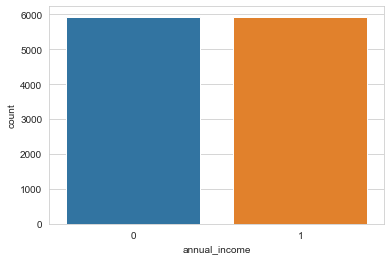

In [190]:
#Instanciando o NearMiss
nr = NearMiss()

#Aplicando
X_under,y_under= nr.fit_resample(X,y)

#checando a amostra
sns.countplot(x=y_under)

In [191]:
from sklearn.datasets import make_classification
X_under, y_under = make_classification()
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under)

In [192]:
classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

for classifier in classifiers:
    pipe = Pipeline(steps=[("classifier", classifier)])
    pipe.fit(X_train, y_train)

    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print("\n---------------------------\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.880

---------------------------

LogisticRegression()
model score: 0.760

---------------------------

DecisionTreeClassifier()
model score: 0.840

---------------------------

RandomForestClassifier()
model score: 0.960

---------------------------

AdaBoostClassifier()
model score: 0.920

---------------------------

GradientBoostingClassifier()
model score: 0.960

---------------------------



In [193]:
#Utilizando o Decision Tree Classifier para desenvolver o modelo preditivo
X_under, y_under = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under,
                                                    random_state=0)

#rfc = RandomForestClassifier(max_depth = 3, min_samples_leaf=3, min_samples_split=2)
rfc=RandomForestClassifier()
pipe = Pipeline([('scaler', StandardScaler()), ('rfc', rfc)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.92

In [194]:
y_pred_rfc = rfc.predict(X_test)
print("\n---------------------------\n")
print("Valores Preditos com dados de Teste :\n",y_pred_rfc)
print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

#Avaliando o modelo preditivo

# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred_rfc))

#Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df2 = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred_rfc})

error_df2


---------------------------

Valores Preditos com dados de Teste :
 [1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0]

---------------------------

Valores Reais com dados de teste :
 [1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0]
Acurácia da Máquina =  0.88

Real vs Predito 
------------------------------



,Real,Predito
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
20,0,1
21,0,0
22,1,1
23,0,0
